In [1]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [2]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**4)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=256)

In [3]:
from pushforward_operators import RectifiedFlowQuantile
from classes import TrainParameters

In [4]:
quantile = RectifiedFlowQuantile(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=4,
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=1000,
    optimizer_parameters=dict(
        lr=1e-1,
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True
)

In [5]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters,
    number_of_rectifying_operations=1,
)

Epoch: 1000, Flow Loss: 2.2450, LR: 0.000000: 100%|██████████| 1000/1000 [00:51<00:00, 19.37it/s]


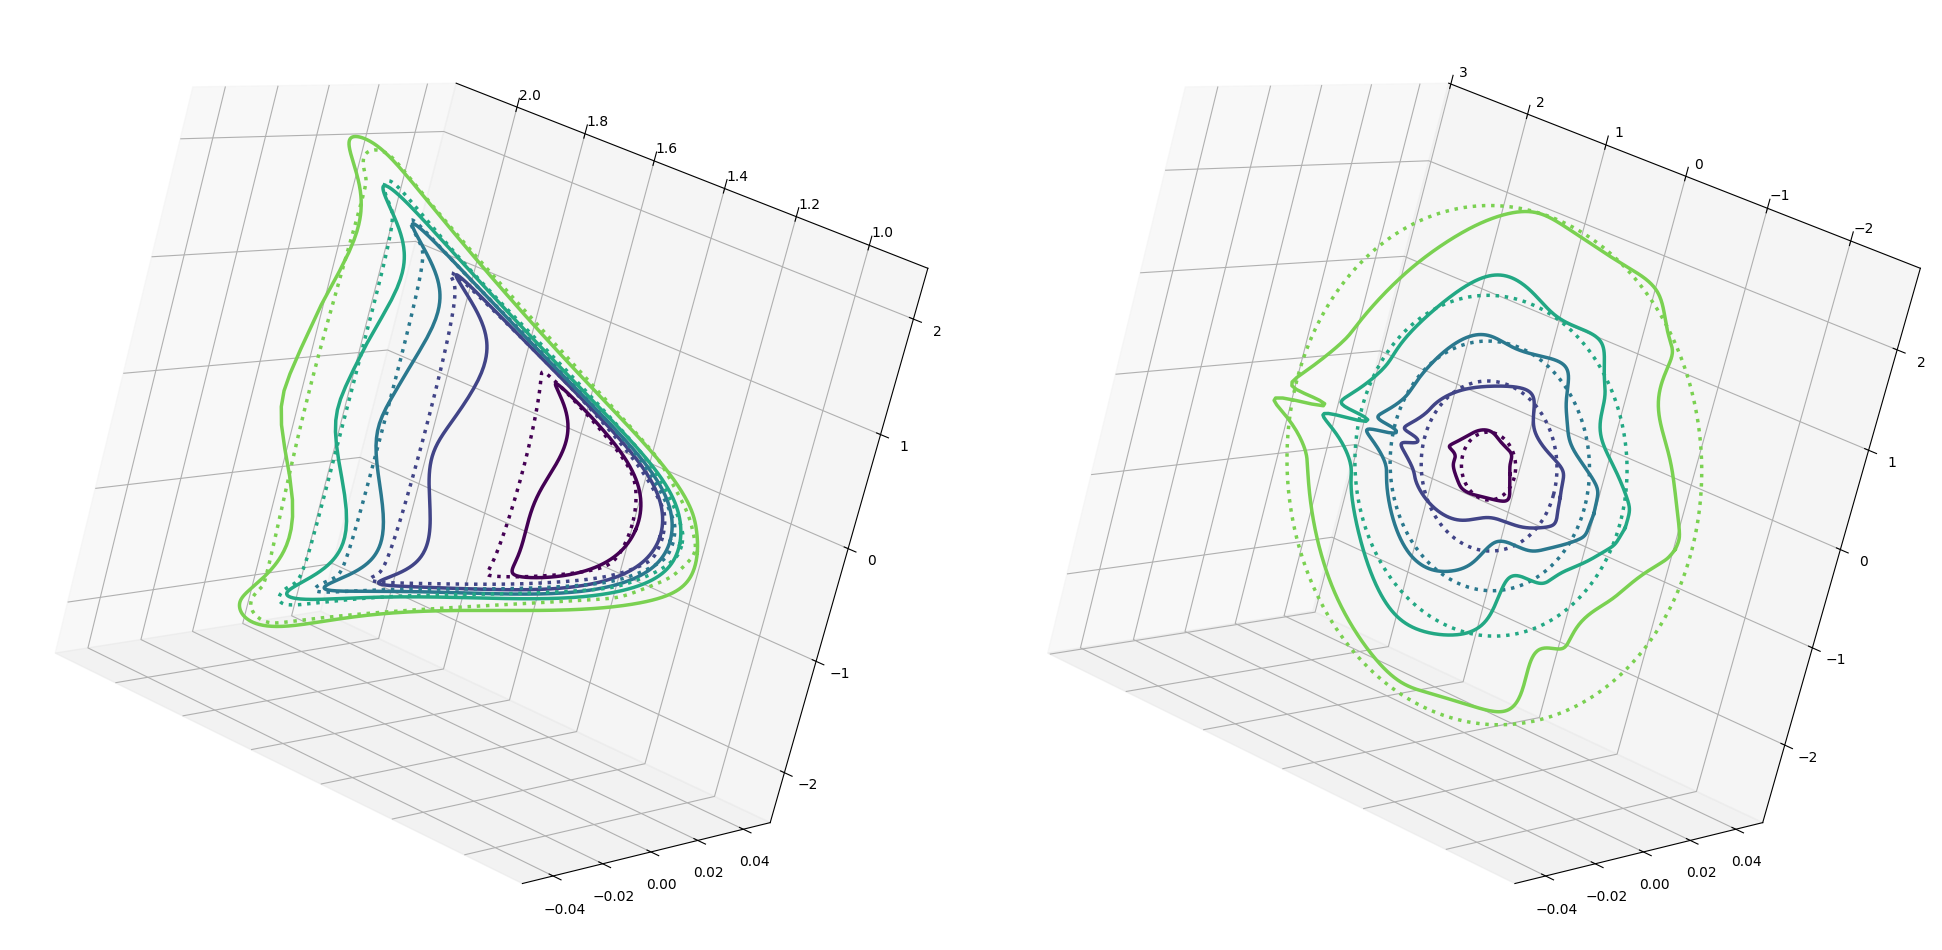

In [11]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.5]]),
    number_of_quantile_levels=5, tensor_parameters={}
)